In [7]:
from transformers import GPT2LMHeadModel, AutoTokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained('gpt2')
sample_text = "Do know where the bus stop is?"
ids = tokenizer(sample_text, return_tensors="pt")
gen = model.generate(**ids, return_dict_in_generate=True, output_scores=True)
tokens = tokenizer.convert_ids_to_tokens(gen.sequences[0])
gen_sentence = tokenizer.batch_decode(gen.sequences, skip_special_tokens=False)[0]
print("Generated ids:", gen.sequences[0].tolist())
print("Corresponding tokens:", tokens)
print("Decoded sentence:", gen_sentence,'\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated ids: [5211, 760, 810, 262, 1323, 2245, 318, 30, 198, 198, 464, 1323, 2245, 318, 5140, 287, 262, 3504, 286, 262]
Corresponding tokens: ['Do', 'Ġknow', 'Ġwhere', 'Ġthe', 'Ġbus', 'Ġstop', 'Ġis', '?', 'Ċ', 'Ċ', 'The', 'Ġbus', 'Ġstop', 'Ġis', 'Ġlocated', 'Ġin', 'Ġthe', 'Ġmiddle', 'Ġof', 'Ġthe']
Decoded sentence: Do know where the bus stop is?

The bus stop is located in the middle of the 



In [11]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = f'Helsinki-NLP/opus-mt-en-it'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, *{}, **{})
tokenizer = AutoTokenizer.from_pretrained(model_name)
sample_text = "Do you happen to know where the bus stop is?"

# Translating to Italian
ids = tokenizer(sample_text,return_tensors="pt")
embeds = model.model.encoder.embed_tokens(ids['input_ids'])
print(embeds.shape)

#gen = model.generate(**ids, return_dict_in_generate=True, **{})
#tokens = tokenizer.convert_ids_to_tokens(gen.sequences[0])
#gen_sentence = tokenizer.batch_decode(gen.sequences, skip_special_tokens=False)[0]
#print("Generated ids:", gen.sequences[0].tolist())
#print("Corresponding tokens:", tokens)
#print("Decoded sentence:", gen_sentence,'\n')
#
## Tokenizing the decoded sentence
#with tokenizer.as_target_tokenizer():
#    generated_tokens = tokenizer.tokenize(gen_sentence)
#    out_ids = tokenizer.encode(gen_sentence)
#print(generated_tokens)

torch.Size([1, 12, 512])


In [6]:
import torch

#ids = torch.tensor([[[x * y for _ in range(513)] for x in range(1,14)] for y in range(1,11)])
ids = torch.tensor([[x * y for x in range(1,14)] for y in range(1,11)])
print(ids.shape)
tgt_mask = torch.randint(0, 2, (10, 1))
#tgt_mask = tgt_mask.unsqueeze(-1)
print(tgt_mask.shape, tgt_mask)
masked_ids = ids.masked_select(tgt_mask.bool()).reshape(-1, *ids.shape[1:])
#print(masked_ids[:, :, 1])
out = torch.rand(masked_ids.shape)
index = tgt_mask.squeeze().nonzero().expand_as(masked_ids)
#torch.zeros_like(ids, dtype=torch.float).scatter(0, index, out)
source = torch.ones_like(ids, dtype=torch.float) * float("nan")
source.scatter(0, index, out)

torch.Size([10, 13])
torch.Size([10, 1]) tensor([[0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0]])


tensor([[   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
            nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
            nan,    nan,    nan,    nan],
        [0.6806, 0.2919, 0.7566, 0.9980, 0.9290, 0.8333, 0.1369, 0.1386, 0.1752,
         0.2415, 0.3117, 0.8380, 0.7610],
        [0.5897, 0.0402, 0.7865, 0.2741, 0.3121, 0.5003, 0.4818, 0.6672, 0.3434,
         0.6939, 0.5428, 0.2278, 0.3984],
        [0.7740, 0.6370, 0.4955, 0.5910, 0.5858, 0.1119, 0.4109, 0.7567, 0.8387,
         0.9883, 0.2711, 0.2715, 0.3441],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
            nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
            nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
            nan,    nan,    nan,    nan],
        [0.2661,

In [16]:
from inspect import getfullargspec, signature
from captum.attr import IntegratedGradients

ig = IntegratedGradients(model)
signature(model.generate).parameters.keys()

model.get_input_embeddings() == model.get_encoder().get_input_embeddings()

NotImplementedError: 

In [90]:
sentences = ["My name is Giorgio", "I am a man"]
ids = tokenizer(sentences,add_special_tokens=True, return_tensors="pt", truncation=True, padding=True)
gen = model.generate(**ids, return_dict_in_generate=True)
print(gen.sequences)
print(tokenizer.batch_decode(gen.sequences, skip_special_tokens=False))

sentences_it = ["Mi chiamo Giorgio.", "Sono un uomo."]
with tokenizer.as_target_tokenizer():
    ids = tokenizer(sentences_it,add_special_tokens=True, return_tensors="pt", truncation=True, padding=True).input_ids
ids

tensor([[80034,   253,  4429,    31, 15355,     2,     0],
        [80034,   460,    23,  1732,     2,     0, 80034]])
['<pad> Mi chiamo Giorgio.', '<pad> Sono un uomo.<pad>']


tensor([[  253,  4429,    31, 15355,     2,     0],
        [  460,    23,  1732,     2,     0, 80034]])

In [91]:
ids.shape

torch.Size([2, 6])

In [ ]:
ids = tokenizer(
    [sample_text],
    add_special_tokens=True,
    truncation=True,
    max_length=tokenizer.max_len_single_sentence,
    padding=True,
    return_tensors="pt",
)
print(ids)

gen = model.generate(
    **ids,
    output_scores=True, return_dict_in_generate=True, use_cache=False
)
print(gen.sequences)
tokenizer.batch_decode(gen.sequences, skip_special_tokens=True)

{'input_ids': tensor([[ 629,   41, 4930,   12,  253,  299,    4, 4843, 2441,   19,   31,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
tensor([[58100,  3613,    42, 16716,     2,   563,    11, 34153,    29,    31,
             0]])


['Wissen Sie zufällig, wo die Bushaltestelle ist?']

In [10]:
from abc import ABC

class A(ABC):
    x = 1

    def __init__(self):
        print("A")
    
    @classmethod
    def subclasses(cls, sup=None, hello=None):
        registry = set()
        for subclass in cls.__subclasses__():
            if subclass not in registry:
                registry.add(subclass)
                registry |= subclass.subclasses()
        return registry

class B(A):
    x = 3
    
    def __init__(self):
        super().__init__()
        print("B")
    
    def test(self):
        return 7

class C(A):
    x = 5
    
    def test(self):
        return 9

class D(B):
    x = 7
    pass

from dataclasses import dataclass

@dataclass
class E(D):
    a: list
    b: str
    c: list

    def __getitem__(self, s):
        return E(self.a[s], self.b[s], self.c[s])

class F(B,C):
    x = 11
    
    def test(self):
        return super().test()

#x = E([1,2,3,4,5], 'aeiou', [['hi'], ['hello'], ['hey'], ['yo'], ['hey']])
#x = x[::-1]
#x.a, x.b, x.c

x = F()
x.test()

A
B


7

In [14]:
import torch
from mymarian import MyMarianMTModel


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, MarianMTModel, T5ForConditionalGeneration


device = 'cpu'
#model_name = f'Helsinki-NLP/opus-mt-en-it'
#model_name = 't5-small'
model_name = f'Helsinki-NLP/opus-mt-en-de'


tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.to(device)
model.eval()
model.zero_grad()

#model.config.num_beams = 1

#sample_text = "translate English to German: My name is Sarah and I live in London"
sample_text = ["Do you happen to know where the bus stop is?", "My name is Giorgio"]

In [47]:
type(model)

transformers.models.marian.modeling_marian.MarianMTModel

In [41]:
batch = tokenizer(sample_text, return_tensors="pt")
input_ids, attention_mask = batch.input_ids, batch.attention_mask
gen = model.generate(
    input_ids=input_ids, 
    attention_mask=attention_mask, 
    output_scores=True, return_dict_in_generate=True, use_cache=False
)
tokenizer.batch_decode(gen.sequences, skip_special_tokens=False)

['<pad> Wissen Sie zufällig, wo die Bushaltestelle ist?']

In [5]:
ids = tokenizer(
    sample_text,
    add_special_tokens=True,
    truncation=True,
    max_length=tokenizer.max_len_single_sentence,
    padding=True,
    return_tensors="pt",
)
print(ids)

gen = model.generate(
    **ids,
    output_scores=True, return_dict_in_generate=True, use_cache=False
)
print(gen.sequences)
tokenizer.batch_decode(gen.sequences, skip_special_tokens=True)

{'input_ids': tensor([[  629,    41,  4930,    12,   253,   299,     4,  4843,  2441,    19,
            31,     0],
        [  587,   671,    19, 45855,     0, 58100, 58100, 58100, 58100, 58100,
         58100, 58100]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])}
tensor([[58100,  3613,    42, 16716,     2,   563,    11, 34153,    29,    31,
             0],
        [58100,  1701,  1282,    29,  3649,   316,  4962,     3,     0, 58100,
         58100]])


['Wissen Sie zufällig, wo die Bushaltestelle ist?', 'Mein Name ist Giorgio.']

In [67]:
tokenizer(['Wissen Sie zufällig, wo die Bushaltestelle ist?'], return_tensors="pt").input_ids

tensor([[ 1699,  4534,    42,    24,   351,  6454,  4679,     2,   563,    11,
         15573,   213,  3180,  2831,    19,    46,    31,     0]])

In [61]:
tokenizer.convert_ids_to_tokens(tokenizer.tokenize('Wissen Sie zufällig, wo die Bushaltestelle ist?').input_ids)

AttributeError: 'list' object has no attribute 'input_ids'

In [4]:
mask = ids["input_ids"]
mask.ne(model.config.eos_token_id).long() * model.config.pad_token_id

tensor([[80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034,
         80034,     0],
        [80034, 80034, 80034, 80034, 80034, 80034,     0, 80034, 80034, 80034,
         80034, 80034]])

In [21]:
input_ids = tokenizer.encode(sample_text, add_special_tokens=True, truncation=True, max_length=tokenizer.max_len_single_sentence)
input_ids = torch.tensor([input_ids], device=device, dtype=torch.long)
attention_mask = torch.ones_like(input_ids, dtype=torch.long)
input_ids, attention_mask

(tensor([[  822,    10,   363,    19,  3833, 11516,     9,     3,    58,  2625,
             10,    86,  7005,     7,    15,  9735,  1863,     6,  3833, 11516,
              9,    19,     3,     9, 25941,     6, 10933,  6358,  1069,    16,
            282,  6390,     6,     3, 16718,   147,    57,     8,  8581,  9899,
             77,     5,     3,     1,     1]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [5]:
encoder = model.get_encoder()
inputs_embeds = encoder.embed_tokens(ids["input_ids"]) * encoder.embed_scale
print(inputs_embeds.shape)
decoder_ids = torch.ones((ids["input_ids"].shape[0], 1), dtype=torch.long) * model.config.decoder_start_token_id
decoder = model.get_decoder()
decoder_embeds = decoder.embed_tokens(decoder_ids) * decoder.embed_scale
print(decoder_embeds.shape)
out = model(
    inputs_embeds=inputs_embeds,
    decoder_inputs_embeds=decoder_embeds,
    attention_mask=ids["attention_mask"]
)

torch.Size([2, 12, 512])
torch.Size([2, 1, 512])


In [21]:
argmax_idxs = out.logits.squeeze(1).argmax(1)
max_scores = out.logits.squeeze(1).max(1)
print(argmax_idxs, max_scores)
out.logits.squeeze(1).index_select(dim=1, index=argmax_idxs).diag().unsqueeze(1)

tensor([494, 760]) torch.return_types.max(
values=tensor([ 9.0862, 10.4151], grad_fn=<MaxBackward0>),
indices=tensor([494, 760]))


tensor([[ 9.0862],
        [10.4151]], grad_fn=<UnsqueezeBackward0>)

In [25]:
def predict(input_ids, attention_mask, decoder_input_ids=None):
    global model
    if decoder_input_ids is None:
        decoder_input_ids = torch.ones((1, 1), dtype=torch.long, device=device) * model.config.decoder_start_token_id
    outputs = model(
        input_ids=input_ids, 
        attention_mask=attention_mask,
        decoder_input_ids=decoder_input_ids,
    )
    return outputs.logits[:, -1, :]

def forward_func(input_ids, attention_mask, decoder_input_ids=None, verbose=False, output_token=False):
    global tokenizer
    logits = predict(input_ids, attention_mask, decoder_input_ids)
    next_token = torch.argmax(logits, dim=-1)
    score = logits.max(-1).values
    if verbose:
        print("Generated token:", tokenizer.decode(next_token), f"({int(next_token[0])}) " "with score", float(score[0]))
    if output_token:
        return next_token
    return score

new_tok = None
decoder_input_ids = torch.ones((1, 1), dtype=torch.long, device=device) * model.config.decoder_start_token_id
while new_tok is None or new_tok[0] != model.config.eos_token_id:
    if new_tok is not None:
        decoder_input_ids = torch.cat((decoder_input_ids, new_tok[:, None]), dim=-1)
    new_tok = forward_func(input_ids, attention_mask, decoder_input_ids=decoder_input_ids, verbose=True, output_token=True)

Generated token:  (3) with score -4.232519149780273
Generated token: a (9) with score -13.264476776123047
Generated token: majestic (25941) with score -4.463294982910156
Generated token: , (6) with score -11.984636306762695
Generated token: enormous (10933) with score -3.123307704925537
Generated token: hall (6358) with score -9.972796440124512
Generated token: located (1069) with score -5.084230899810791
Generated token: in (16) with score -11.392878532409668
Generated token: As (282) with score -9.637094497680664
Generated token: gard (6390) with score -7.734871864318848
Generated token: , (6) with score -3.8380584716796875
Generated token:  (3) with score -6.948188304901123
Generated token: ruled (16718) with score -7.179008483886719
Generated token: over (147) with score -11.284448623657227
Generated token: by (57) with score -11.73874282836914
Generated token: the (8) with score -13.138486862182617
Generated token: god (8581) with score -8.506855010986328
Generated token: Od (9899

In [40]:
from captum.attr import LayerIntegratedGradients

lig = LayerIntegratedGradients(forward_func, model.model.encoder.embed_tokens)

ref_input_ids = torch.tensor([[model.config.pad_token_id] * (input_ids.shape[1] - 1) + [model.config.eos_token_id]])
decoder_input_ids = torch.ones((1, 1), dtype=torch.long, device=device) * model.config.decoder_start_token_id
print(input_ids, ref_input_ids, decoder_input_ids)

attributions, delta = lig.attribute(
    inputs=input_ids,
    baselines=ref_input_ids,
    additional_forward_args=(attention_mask, decoder_input_ids, False, False),
    return_convergence_delta=True
)
delta, attributions

tensor([[ 295,   29, 3710,   11,  172,  328,    4, 2040, 1770,   24,   19,    0]]) tensor([[80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034, 80034,
         80034,     0]]) tensor([[80034]])


(tensor([-2.2255], dtype=torch.float64),
 tensor([[[0., 0., 0., 0., 0., -0., -0., -0., 0., -0., -0., 0., -0., -0., 0., 0., -0., -0., 0., 0., -0., -0., -0.,
           0., -0., -0., 0., -0., -0., -0., -0., -0., -0., 0., 0., -0., -0., -0., -0., 0., 0., 0., -0., -0., -0., -0.,
           0., 0., -0., -0., 0., -0., -0., 0., 0., -0., -0., 0., 0., 0., -0., 0., 0., -0., 0., -0., 0., -0., 0.,
           0., -0., 0., -0., -0., -0., -0., 0., 0., -0., -0., 0., 0., -0., -0., 0., 0., -0., 0., 0., -0., 0., -0.,
           -0., 0., -0., -0., 0., -0., 0., -0., -0., 0., -0., -0., 0., -0., -0., 0., -0., 0., -0., 0., -0., 0., 0.,
           0., -0., -0., -0., -0., 0., -0., 0., 0., -0., 0., 0., 0., -0., 0., 0., 0., -0., -0., 0., -0., -0., -0.,
           0., -0., 0., -0., -0., 0., -0., 0., -0., -0., -0., 0., -0., 0., -0., -0., -0., -0., -0., 0., 0., -0., -0.,
           -0., -0., 0., 0., -0., -0., 0., -0., 0., -0., -0., 0., 0., 0., -0., -0., 0., 0., -0., -0., -0., -0., -0.,
           0., 0., -0., -0., 0.

In [ ]:
torch.tensor([model.config.decoder_start_token_id] + tokenizer.encode())

In [36]:
decoder_input_ids

tensor([[    0,     3,     9, 25941,     6, 10933,  6358,  1069,    16,   282,
          6390,     6,     3, 16718,   147,    57,     8,  8581,  9899,    77]])

In [8]:
from captum.attr import configure_interpretable_embedding_layer, IntegratedGradients, InterpretableEmbeddingBase

if not isinstance(model.model.encoder.embed_tokens, InterpretableEmbeddingBase):
    interpretable_emb = configure_interpretable_embedding_layer(model.model.encoder, "embed_tokens")
if not isinstance(model.model.decoder.embed_tokens, InterpretableEmbeddingBase):
    interpretable_emb_dec = configure_interpretable_embedding_layer(model.model.decoder, "embed_tokens")
input_embeds = interpretable_emb.indices_to_embeddings(ids["input_ids"])
decoder_input_ids = torch.ones((2, 1), dtype=torch.long, device=device) * model.config.decoder_start_token_id
decoder_input_embeds = interpretable_emb_dec.indices_to_embeddings(decoder_input_ids)
print(input_embeds.shape, decoder_input_embeds.shape)

def predict(inputs_embeds, attention_mask, decoder_inputs_embeds):
    global model
    outputs = model(
        inputs_embeds=inputs_embeds, 
        attention_mask=attention_mask,
        decoder_inputs_embeds=decoder_inputs_embeds,
    )
    return outputs.logits[:, -1, :]

def forward_func(inputs_embeds, attention_mask, decoder_inputs_embeds, verbose=False, output_token=False):
    global tokenizer
    logits = predict(inputs_embeds, attention_mask, decoder_inputs_embeds)
    next_token = torch.argmax(logits, dim=-1)
    score = logits.max(-1).values
    if verbose:
        print("Generated token:", tokenizer.decode(next_token), f"({int(next_token[0])}) " "with score", float(score[0]))
    if output_token:
        return next_token
    return score

ig = IntegratedGradients(forward_func)
attribution, delta = ig.attribute(input_embeds, additional_forward_args=(ids["attention_mask"], decoder_input_embeds, False, False), return_convergence_delta=True)
print(delta)

torch.Size([2, 12, 512]) torch.Size([2, 1, 512])
tensor([2.7244e-06, 1.4541e-06], dtype=torch.float64)


In [9]:
attribution.shape

torch.Size([2, 12, 512])

In [10]:
print(attribution.shape)
attribution = attribution.sum(dim=-1).squeeze(0)
attribution = attribution / torch.norm(attribution)
attribution.shape

torch.Size([2, 12, 512])


torch.Size([2, 12])

In [52]:
attribution2 = attribution

In [53]:
attribution2 = attribution2 * 10

In [54]:
attribution2

tensor([ 4.9009,  0.5630, -0.0612,  7.2077, -0.5418,  0.5328,  0.3939, -1.9363,
        -3.0155, -2.0120,  2.3732,  0.6746], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [55]:
attribution = attribution.unsqueeze(1)
attribution2 = attribution2.unsqueeze(1)

In [56]:
attribution.shape, attribution2.shape

(torch.Size([12, 1]), torch.Size([12, 1]))

In [60]:
x = torch.cat((attribution, attribution2), dim=1)

In [61]:
x[1,:]

tensor([0.0563, 0.5630], dtype=torch.float64, grad_fn=<SliceBackward>)

/home/gsarti/projects/ig_nmt/venv/lib/python3.8/site-packages/captum/attr/_models/base.py:188: UserWarning: In order to make embedding layers more interpretable they will be replaced with an interpretable embedding layer which wraps the original embedding layer and takes word embedding vectors as inputs of the forward function. This allows us to generate baselines for word embeddings and compute attributions for each embedding dimension. The original embedding layer must be set back by calling `remove_interpretable_embedding_layer` function after model interpretation is finished. 
  warnings.warn(
INFO:attr_model:Original: Hello world!
Generating: ▁Ciao,▁mondo!: : 7it [00:08,  1.21s/it]
INFO:attr_model:Finished attributing generated string "Ciao, mondo!"


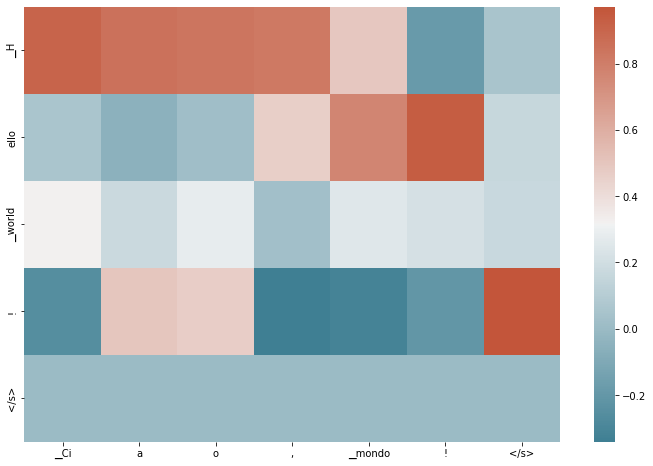

In [1]:
import logging
from attr_model import AttributionModel

logging.basicConfig(level=logging.INFO)

model_name = f'Helsinki-NLP/opus-mt-en-it'
model = AttributionModel(model_name)
sample_text = "Hello world!"
out = model.attribute(sample_text, n_steps=50)
model.visualize_attributions(out)

In [3]:
out.deltas

[-0.28048738165746245,
 0.5285938915833821,
 0.21297562961929462,
 -1.3000355160509416,
 -1.002344384833507,
 0.041601142474030656,
 -0.0637820084424518,
 0.043083353398396085,
 0.7208574100955614,
 1.5340149417882891,
 0.10151500315874351,
 0.148479246777029,
 -0.032789700885819784,
 -0.05692243419200116,
 0.1259051651032097,
 -1.2650261227160255,
 -0.006238259488731801]